In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr


In [2]:
#filename_goes_sst = 'F:/data/cruise_data/saildrone/baja-2018/other_format_shared_data/goes_sst_collocation_data.npy'
#gsst = np.load(filename_goes_sst)    
filename_goes_sst = 'F:/data/cruise_data/saildrone/baja-2018/other_format_shared_data/goes_sst_collocation_data.nc'
ds_goes = xr.open_dataset(filename_goes_sst)
ds_goes = ds_goes.isel(trajectory=0)
gsst=ds_goes.goes_sst
filename_loggers_out_nc='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1_withloggers.nc'
ds=xr.open_dataset(filename_loggers_out_nc)
ds = ds.isel(trajectory=0)
ds_goes = ds_goes.set_index(obs=['time'])
ds = ds.set_index(obs=['time'])


<xarray.DataArray 'goes_sst' (obs: 10)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
  * obs         (obs) datetime64[ns] 2018-04-11T18:00:00 ... 2018-04-11T18:09:00
    trajectory  float32 1002.0
    latitude    (obs) float64 ...
    longitude   (obs) float64 ...

In [3]:
ds['wspd'] = (ds.UWND_MEAN**2+ds.VWND_MEAN**2)**.5

In [4]:
#skin=ds.TEMP_IR_UNCOR_MEAN[0,:].values
#tair=ds.TEMP_AIR_MEAN[0,:].values
#bulk1=ds.TEMP_CTD_MEAN[0,:].values
#bulk2=ds.TEMP_O2_MEAN[0,:].values
##uspd=ds.UWND_MEAN[0,:].values
#vspd=ds.VWND_MEAN[0,:].values
#wspd=(uspd**2+vspd**2)**.5
#tdim=len(wspd)
#tem_date=[0]*tdim
#day_of_year=[0]*tdim
#tem_dy_from=[0]*tdim
#print(ds.time.shape)
#for i in range(0,tdim):
#    tem_dy_from[i]=float(ds.time[0,i].values)/86400000000000.-float(ds.time[0,0].values)/86400000000000.
#    tem2=(ds.time[0,i].values-np.datetime64('1970-01-01'))/np.timedelta64(1,'s')
#    tem3=datetime.utcfromtimestamp(tem2)
#    day_of_year[i] = tem3.timetuple().tm_yday
#    tem_date[i] = tem3
print(len(tem_dy_from))
print(len(skin-bulk1),tdim)
print(len(gsst))
mindy=min(tem_date)
maxdy=max(tem_date)
print(maxdy-mindy)
intdy=(maxdy-mindy)/12.


NameError: name 'tem_dy_from' is not defined

In [5]:
base = dt.datetime(2018, 4, 11)
arr = np.array([base + dt.timedelta(days=i*10) for i in range(6)])
#print(arr)
adir_goes='F:/data/cruise_data/saildrone/baja-2018/figs/goes_collocations/' 
adir_goes = 'C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/'
fig = plt.figure(figsize=(11.7,8.3))
ax = plt.subplot(111)
for i in range (0,2): #len(arr)-1):
    subset = ds.sel(obs=slice(arr[i],arr[i+1]))
    subset_goes = ds_goes.sel(obs=slice(arr[i],arr[i+1]))
    plt.scatter(subset.obs.values,subset.TEMP_IR_UNCOR_MEAN-subset.TEMP_CTD_MEAN, s=2, label='Skin - CTD bulk')
    plt.scatter(subset.obs.values,subset.TEMP_IR_UNCOR_MEAN-subset.sea_water_temperature_logger1_mean, s=1, label='Skin - Logger 1 bulk')
    plt.scatter(subset_goes.obs.values,subset_goes.goes_sst-273.15-subset.TEMP_CTD_MEAN,s=2, label='GOES - CTD bulk')
    plt.axis([arr[i],arr[i+1], -2,2])
    plt.xlabel('Date')
    plt.ylabel('$\Delta$SST (K)')
    plt.legend()
    fig_fname=adir_goes+'skinbulk_goes_TS' + str(i) +'_10day.png'
    print(fig_fname)
    #plt.savefig(fig_fname, transparent=False, format='png')
    plt.clf()



C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/skinbulk_goes_TS0_10day.png
C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/skinbulk_goes_TS1_10day.png


<Figure size 842.4x597.6 with 0 Axes>

In [22]:
plt.clf()
base = dt.datetime(2018, 4, 11)
arr = np.array([base + dt.timedelta(days=i*10) for i in range(6)])
#print(arr)
adir_goes='F:/data/cruise_data/saildrone/baja-2018/figs/goes_collocations/' 
adir_goes = 'C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/'
fig = plt.figure(figsize=(11.7,8.3))
ax = plt.subplot(111)
for i in range (0,len(arr)-1):
    subset = ds.sel(obs=slice(arr[i],arr[i+1]))
    subset_goes = ds_goes.sel(obs=slice(arr[i],arr[i+1]))
#    subset = ds.sel(obs=slice(arr[i],arr[i+1]))
#    subset_goes = ds_goes.sel(obs=slice(arr[i],arr[i+1]))
    cond = np.isnan(subset_goes.goes_sst)
    notcond = np.isfinite(subset_goes.goes_sst)
    plt.scatter(subset.obs[cond].values,subset.TEMP_IR_UNCOR_MEAN[cond]-subset.TEMP_CTD_MEAN[cond], s=2, label='cloudy')
    plt.scatter(subset.obs[notcond].values,subset.TEMP_IR_UNCOR_MEAN[notcond]-subset.TEMP_CTD_MEAN[notcond], s=2, label='clear')
    plt.axis([arr[i],arr[i+1], -.75,.75])
    plt.xlabel('Date')
    plt.ylabel('$\Delta$SST (K)')
    plt.legend()
    fig_fname=adir_goes+'skinbulk_goes_TS' + str(i) +'_10day2.png'
    print(fig_fname)
    plt.savefig(fig_fname, transparent=False, format='png')
    plt.clf()


C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/skinbulk_goes_TS0_10day2.png
C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/skinbulk_goes_TS1_10day2.png
C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/skinbulk_goes_TS2_10day2.png
C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/skinbulk_goes_TS3_10day2.png
C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/figs/skinbulk_goes_TS4_10day2.png


<Figure size 432x288 with 0 Axes>

<Figure size 842.4x597.6 with 0 Axes>

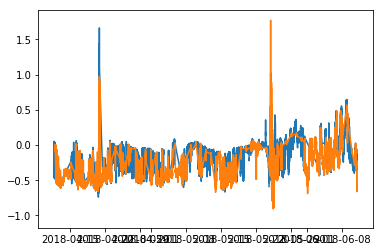

In [20]:
cond = np.isnan(ds_goes.goes_sst)
notcond = np.isfinite(ds_goes.goes_sst)
plt.plot(ds.obs[cond].values,ds.TEMP_IR_UNCOR_MEAN[cond]-ds.TEMP_CTD_MEAN[cond], label='cloudy')
plt.plot(ds.obs[notcond].values,ds.TEMP_IR_UNCOR_MEAN[notcond]-ds.TEMP_CTD_MEAN[notcond], label='clear')
